In [1]:
import mne
import pandas as pd
from scipy.fft import fft, fftfreq, rfft, rfftfreq, rfftn 
import numpy as np
import scipy
import matplotlib.pyplot as plt 
import os
from edf_file_processing import create_raw_object, visualize_data, find_all_paths

In [2]:
# ./train/02_tcp_le/014/00001479/s001_2004_06_14/00001479_s001_t001.tse
rawEDF = create_raw_object("edf/train/02_tcp_le/014/00001479/s001_2004_06_14/filtered_00001479_s001_t001.edf")

Extracting EDF parameters from /home/sophia/projects/eeg_epilepsy/edf/train/02_tcp_le/014/00001479/s001_2004_06_14/filtered_00001479_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
rawEDF.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2020-11-20 07:43:35 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>

In [4]:
def fast_fourier_transform(rawEDF, if_real_value=False):
    start, stop = rawEDF.time_as_index([100, 101])
    print(start, stop)
    data, times = rawEDF[:, start:stop]
    print(data.shape)
    
    if if_real_value is True:
        yf = fft(data[1])
        xf = fftfreq(250, 1 / 250)
    else:
        yf = rfft(data[1])
        xf = rfftfreq(250, 1 / 250)

    plt.plot(xf, np.abs(yf))
    plt.show()

In [5]:
start, stop = rawEDF.time_as_index([100, 120])
print(start, stop)
data, times = rawEDF[:, start:stop]

s, st = rawEDF.time_as_index([950, 970])
print(s, st)
d, t = rawEDF[:, s:st]

25000 30000
237500 242500


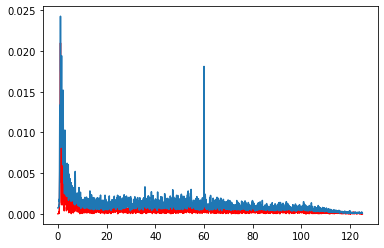

In [6]:
yf = rfftn(data).sum(axis=0) / len(data)
# normalized_yf = 
# len(yf)
# yf
xf = rfftfreq(250*20, 1 / 250)
plt.plot(xf, np.abs(yf), 'r')
plt.plot(rfftfreq(250*20, 1 / 250), np.abs(rfft(d)).sum(axis=0) / len(d))
plt.show()